## Advanced Pandas, Basic Python Viz and Exercise

### Exercise
1. Use the same dataframes you generated or copied to this directory from the 03 Exercise:
    1. Extract of any SQL database 
    1. Imported file from your capstone work
    1. Any other data from other exercises you have aleady used
1. Import into Pandas
1. Generate at least three additional dataframes with analytics introduced in this notebook
    1. Melt
    1. Pivot
    1. Quantile
    1. Aggregations
1. Build at least three  visualizations supported by Pandas directly using prior analytics from the 03 Exercise or new analytics from this exercise

# Shane Dirksen
## Exercise

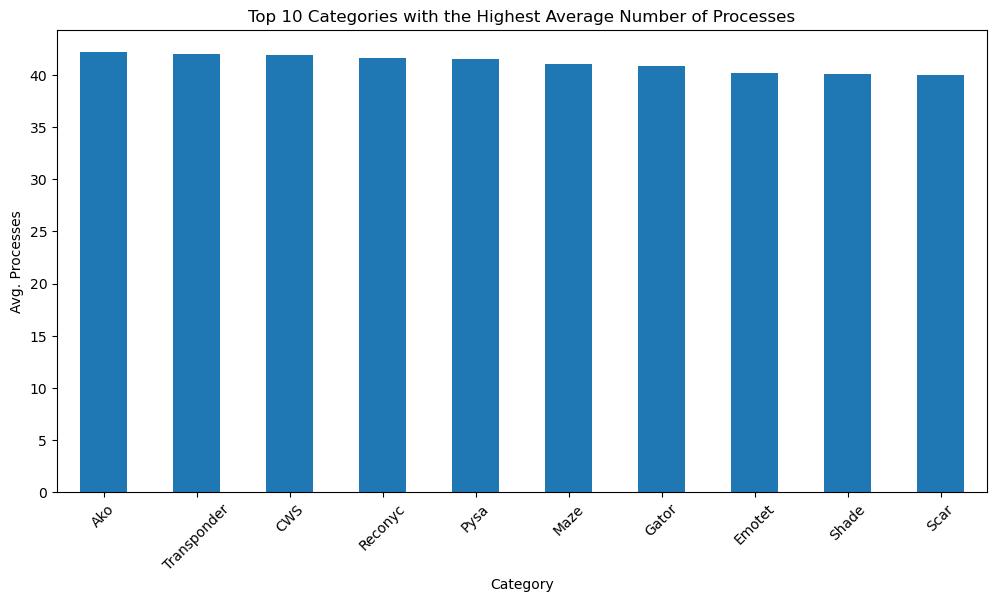

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = 'Obfuscated-MalMem2022.csv'
sample_df = pd.read_csv(file_path).sample(frac=0.1, random_state=42)

quantiles = df.quantile([0.25, 0.5, 0.75])

numeric_columns = df.select_dtypes(include=np.number).columns

aggregations = df[numeric_columns].aggregate([np.mean, np.median, np.min, np.max])

melted_df = pd.melt(df, id_vars=['Category'], var_name='Metric', value_name='Value')

sample_df['Category'] = sample_df['Category'].str.extract(r'-([^-\s]+)')

avg_procs_sample = sample_df.groupby('Category')['pslist.nproc'].mean()

top_categories = avg_procs_sample.nlargest(10)

top_categories.plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 Categories with the Highest Average Number of Processes')
plt.xlabel('Category')
plt.ylabel('Avg. Processes')
plt.xticks(rotation=45)
plt.show()

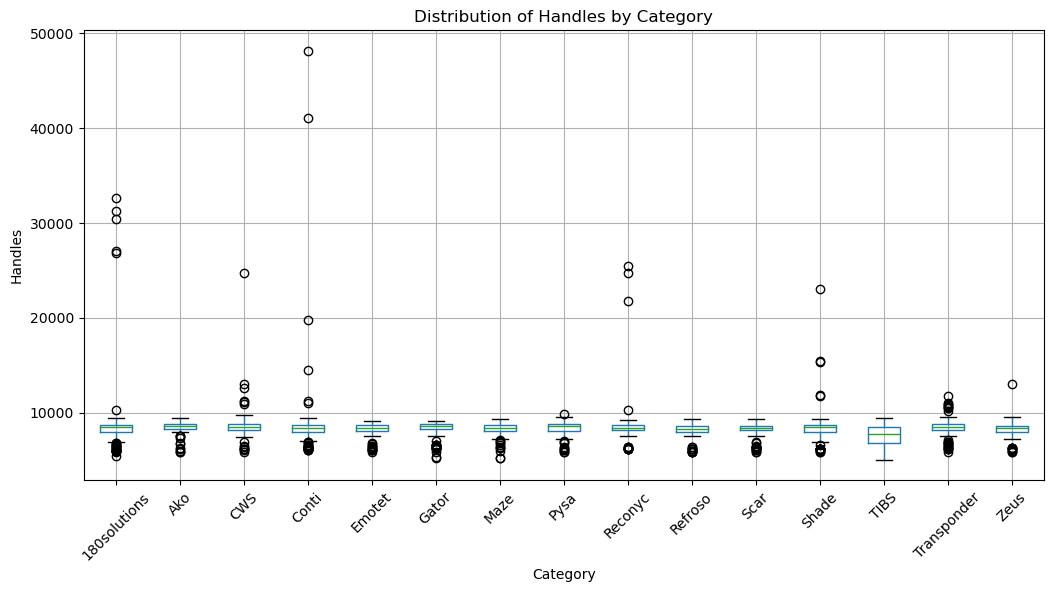

In [12]:
sample_df.boxplot(column='handles.nhandles', by='Category', figsize=(12, 6))
plt.title('Distribution of Handles by Category')
plt.xlabel('Category')
plt.ylabel('Handles')
plt.xticks(rotation=45) 
plt.suptitle("") 
plt.show()

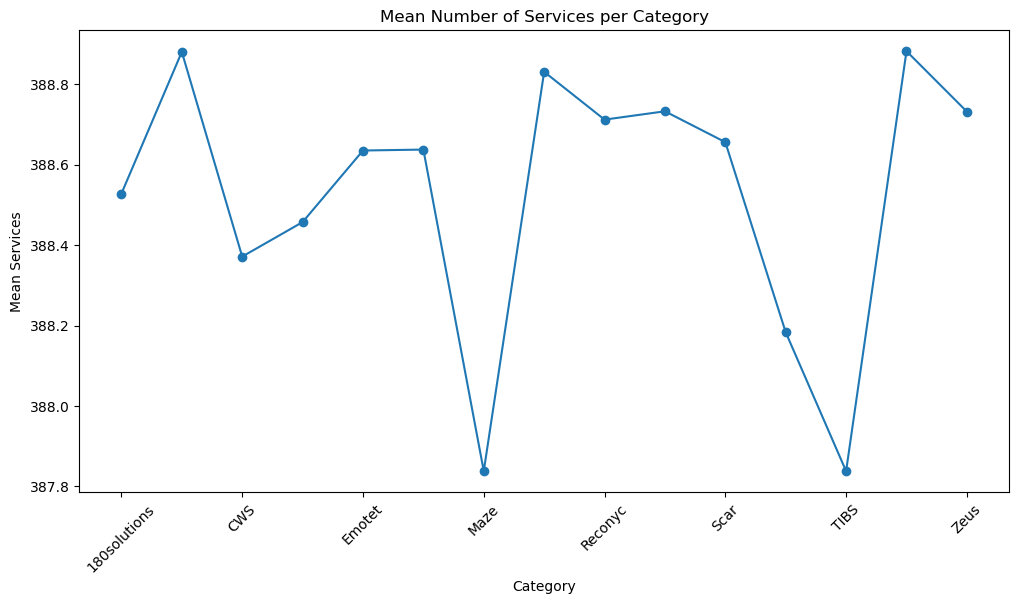

In [13]:
mean_services_sample = sample_df.groupby('Category')['svcscan.nservices'].mean()

mean_services_sample.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Mean Number of Services per Category')
plt.xlabel('Category')
plt.ylabel('Mean Services')
plt.xticks(rotation=45)
plt.show()

In [1]:
!pip install openpyxl

     ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
     -------------------------------------- 250.0/250.0 kB 7.5 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd

## Get the data

### Read a CSV file from a website into a DataFrame

In [3]:
import pandas as pd
url = 'https://data.cdc.gov/api/views/v6ab-adf5/rows.csv?accessType=DOWNLOAD'
mortality_data = pd.read_csv(url)

In [4]:
type(mortality_data)

pandas.core.frame.DataFrame

In [5]:
mortality_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        476 non-null    int64  
 1   Age Group   476 non-null    object 
 2   Death Rate  476 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 11.3+ KB


In [11]:
mortality_data.query("`Death Rate` == None").count()

Year          0
Age Group     0
Death Rate    0
dtype: int64

In [6]:
mortality_data.describe()

,Year,Death Rate
count,476.000000,476.000000
mean,1959.000000,192.924160
std,34.387268,293.224216
min,1900.000000,11.400000
25%,1929.000000,40.575000
50%,1959.000000,89.500000
75%,1989.000000,222.575000
max,2018.000000,1983.800000


In [30]:
mortality_data.describe(include="O")

,Age Group
count,476
unique,4
top,1-4 Years
freq,119


In [31]:
mortality_data[["Age Group"]].value_counts()

Age Group  
1-4 Years      119
10-14 Years    119
15-19 Years    119
5-9 Years      119
dtype: int64

In [26]:
round(
    (1983.8-11.4)/293.224216
    ,2)

6.73

In [16]:
print("number of sigmas: "+ str((1983.8-11.4)/293.224216))

number of sigmas: 6.726593140588361


In [20]:
print("number of sigmas: {} {} {}".format(round((1983.8-11.4)/293.224216,2),1,2))

number of sigmas: 6.73 1 2


pandas.core.frame.DataFrame

<AxesSubplot: xlabel='Year'>

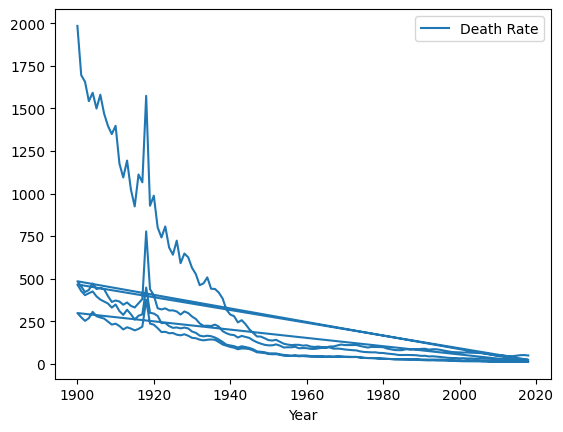

In [28]:
mortality_data.plot.line(x="Year", y = "Death Rate")

In [29]:
mortality_data

,Year,Age Group,Death Rate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
2,1902,1-4 Years,1655.7
3,1903,1-4 Years,1542.1
4,1904,1-4 Years,1591.5
...,...,...,...
471,2014,15-19 Years,45.5
472,2015,15-19 Years,48.3
473,2016,15-19 Years,51.2
474,2017,15-19 Years,51.5


1900    4
1975    4
1987    4
1986    4
1985    4
       ..
1935    4
1934    4
1933    4
1932    4
2018    4
Name: Year, Length: 119, dtype: int64

In [44]:
value_counts = mortality_data.Year.value_counts()
df = pd.DataFrame({'values': value_counts.index, 'counts': value_counts.values})

df

,values,counts
0,1900,4
1,1975,4
2,1987,4
3,1986,4
4,1985,4
...,...,...
114,1935,4
115,1934,4
116,1933,4
117,1932,4


In [32]:
# SELECT [Age Group] , Year, COUNT(*) GROUP BY [Age Group], Year
mortality_data[['Age Group','Year']].value_counts()

Age Group    Year
1-4 Years    1900    1
15-19 Years  1975    1
             1987    1
             1986    1
             1985    1
                    ..
10-14 Years  1935    1
             1934    1
             1933    1
             1932    1
5-9 Years    2018    1
Length: 476, dtype: int64

### Save and restore a DataFrame

In [36]:
mortality_data.to_csv('mortality_data.csv')

In [33]:
mortality_data.to_pickle('mortality_data.pkl')

In [34]:
mortality_data = pd.read_pickle('mortality_data.pkl')

In [35]:
mortality_data.head()

,Year,Age Group,Death Rate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
2,1902,1-4 Years,1655.7
3,1903,1-4 Years,1542.1
4,1904,1-4 Years,1591.5


## Examine and clean the data

In [37]:
print("Index:  ", mortality_data.index)
print("Columns:", mortality_data.columns)
print("Size:   ", mortality_data.size)
print("Shape:  ", mortality_data.shape)

Index:   RangeIndex(start=0, stop=476, step=1)
Columns: Index(['Year', 'Age Group', 'Death Rate'], dtype='object')
Size:    1428
Shape:   (476, 3)


### Use the columns attribute to replace spaces with nothing


In [38]:
mortality_data.columns = mortality_data.columns.str.replace(' ', '')
mortality_data.columns

Index(['Year', 'AgeGroup', 'DeathRate'], dtype='object')

In [39]:
mortality_data.head()

,Year,AgeGroup,DeathRate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
2,1902,1-4 Years,1655.7
3,1903,1-4 Years,1542.1
4,1904,1-4 Years,1591.5


In [40]:
mortality_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,476.0,1959.00000,34.387268,1900.0,1929.000,1959.0,1989.000,2018.0
DeathRate,476.0,192.92416,293.224216,11.4,40.575,89.5,222.575,1983.8


In [41]:
mortality_data.describe(include="O").T

,count,unique,top,freq
AgeGroup,476,4,1-4 Years,119


In [45]:
len(mortality_data.DeathRate.value_counts())

430

In [51]:
mortality_data.query("AgeGroup == '1-4 Years'").count()

Year         119
AgeGroup     119
DeathRate    119
dtype: int64

In [53]:
mortality_data.query("DeathRate >= 200").count()

Year         135
AgeGroup     135
DeathRate    135
dtype: int64

<AxesSubplot: >

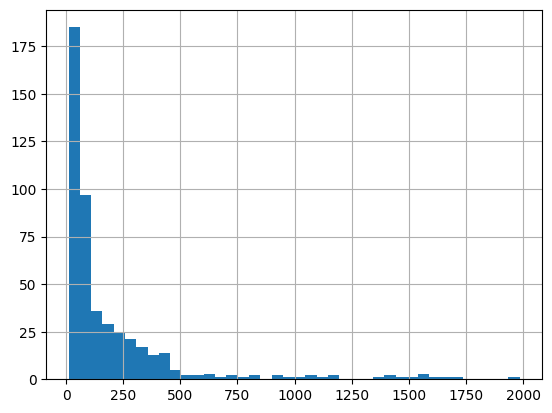

In [49]:
mortality_data.DeathRate.hist(bins= 40)

In [54]:
import numpy as np
mortality_data['death_log']= np.log10(mortality_data['DeathRate'])

In [55]:
mortality_data.describe()

,Year,DeathRate,death_log
count,476.000000,476.000000,476.000000
mean,1959.000000,192.924160,1.974020
std,34.387268,293.224216,0.507702
min,1900.000000,11.400000,1.056905
25%,1929.000000,40.575000,1.608258
50%,1959.000000,89.500000,1.951823
75%,1989.000000,222.575000,2.347475
max,2018.000000,1983.800000,3.297498


In [117]:
mortality_data.death_log.mean()

1.9740203741438487

<AxesSubplot: >

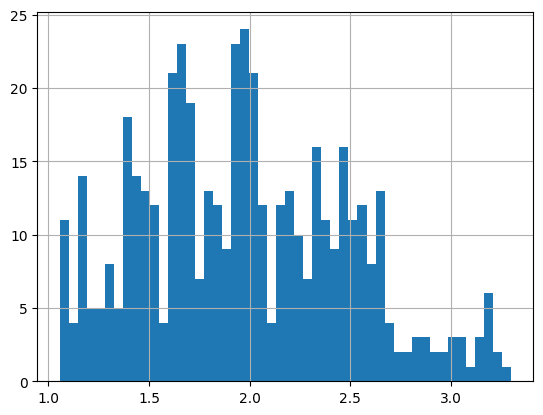

In [56]:
mortality_data.death_log.hist(bins=50)

<AxesSubplot: >

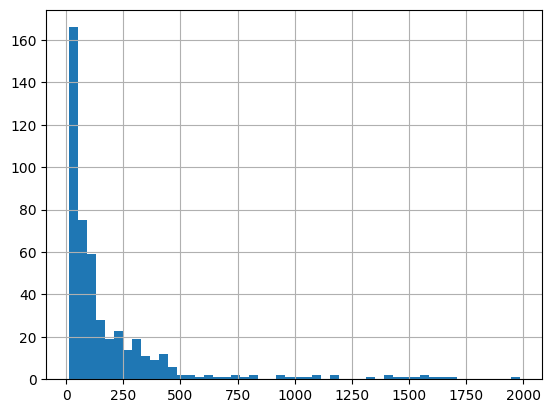

In [57]:
mortality_data.DeathRate.hist(bins=50)

In [ ]:
mortality_data.describe(include='O')

In [ ]:
mortality_data.describe().T

## Access the data

In [69]:
mortality_data[mortality_data.Year == 2000 & mortality_data.AgeGroup != '1-4 Years']

TypeError: Cannot perform 'rand_' with a dtyped [object] array and scalar of type [bool]

array([[<AxesSubplot: title={'center': 'Year'}>,
        <AxesSubplot: title={'center': 'DeathRate'}>],
       [<AxesSubplot: title={'center': 'death_log'}>, <AxesSubplot: >]],
      dtype=object)

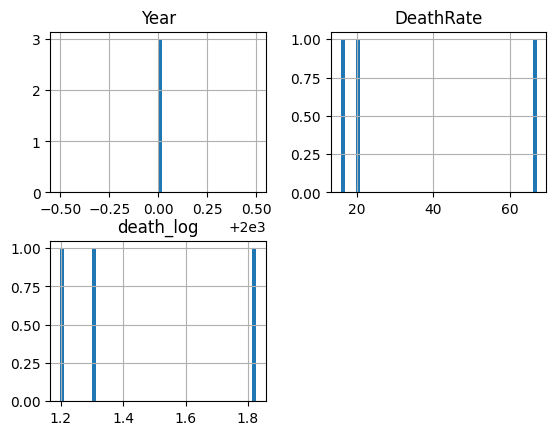

In [59]:
mortality_data.query("Year == 2000 and AgeGroup != '1-4 Years'").hist(bins=50)

In [71]:
mortality_data.query('Year == 1900 or Year == 2000').head()

,Year,AgeGroup,DeathRate,death_log
0,1900,1-4 Years,1983.8,3.297498
100,2000,1-4 Years,32.4,1.510545
119,1900,5-9 Years,466.1,2.668479
219,2000,5-9 Years,15.8,1.198657
238,1900,10-14 Years,298.3,2.474653


In [70]:
# use backticks if a column name contains spaces
mortality_data.query('Year == 2000 and `AgeGroup` != "1-4 Years"')

,Year,AgeGroup,DeathRate,death_log
219,2000,5-9 Years,15.8,1.198657
338,2000,10-14 Years,20.3,1.307496
457,2000,15-19 Years,67.1,1.826723


### Access a subset of rows and columns

In [72]:
mortality_data.query('Year == 1900').DeathRate.head()

0      1983.8
119     466.1
238     298.3
357     484.8
Name: DeathRate, dtype: float64

In [73]:
mortality_data.query('Year == 1900')['DeathRate'].head()

0      1983.8
119     466.1
238     298.3
357     484.8
Name: DeathRate, dtype: float64

In [74]:
mortality_data.query('Year == 1900')[['AgeGroup','DeathRate']].head()

,AgeGroup,DeathRate
0,1-4 Years,1983.8
119,5-9 Years,466.1
238,10-14 Years,298.3
357,15-19 Years,484.8


### Apply statistical methods

In [75]:
#mean = sum of values / count of case/observation
md_mu = mortality_data["DeathRate"].mean()


In [76]:
md_sigma = mortality_data["DeathRate"].std()

In [81]:
md_log_mu = mortality_data["death_log"].mean()
md_log_sigma = mortality_data["death_log"].std()


In [82]:
#95% confidence interval is mean +/- 2 stdev
print ("death_lograte is {} +/- {}".format(md_log_mu,2*md_log_sigma))
print ("death_lograte CV is {} % ".format(round((md_log_sigma/md_log_mu)*100.0),2))

death_lograte is 1.9740203741438487 +/- 1.0154036228678984
death_lograte CV is 26 % 


In [83]:
#coefficient of variance ("good" < .05)
print ("deathrate is {} +/- {}".format(md_mu,2*md_sigma))
print ("deathrate CV is {} % ".format(round((md_sigma/md_mu)*100.0),2))

deathrate is 192.92415966386554 +/- 586.4484319208575
deathrate CV is 152 % 


In [84]:
mortality_data['outlier'] = mortality_data['DeathRate'].apply(
        lambda x: 
        True 
        if ( x > md_mu + 2*md_sigma or x < md_mu - 2*md_sigma)  
        else False 
            )


In [85]:
mortality_data.outlier.value_counts()

False    453
True      23
Name: outlier, dtype: int64

In [86]:
.05*476

23.8

In [87]:
# line you draw for equal number of cases on either side
mortality_data.DeathRate.median()

89.5

In [88]:
mortality_data[['AgeGroup','DeathRate']].max()

AgeGroup     5-9 Years
DeathRate       1983.8
dtype: object

In [89]:
mortality_data.count()

Year         476
AgeGroup     476
DeathRate    476
death_log    476
outlier      476
dtype: int64

In [90]:
[i/20 for i in range(0,20)]

[0.0,
 0.05,
 0.1,
 0.15,
 0.2,
 0.25,
 0.3,
 0.35,
 0.4,
 0.45,
 0.5,
 0.55,
 0.6,
 0.65,
 0.7,
 0.75,
 0.8,
 0.85,
 0.9,
 0.95]

In [95]:
type(mortality_data.DeathRate.quantile(0.62)) #50% or median

numpy.float64

In [ ]:
len(mortality_data)

In [100]:
type(mortality_data.DeathRate)

pandas.core.series.Series

In [108]:
mort_dist = mortality_data.DeathRate.quantile([i/20 for i in range(0,20)])
mort_dist

0.00     11.400
0.05     15.050
0.10     21.500
0.15     26.350
0.20     31.800
0.25     40.575
0.30     45.050
0.35     51.275
0.40     63.800
0.45     80.050
0.50     89.500
0.55     98.975
0.60    110.400
0.65    142.725
0.70    180.400
0.75    222.575
0.80    279.900
0.85    330.725
0.90    430.850
0.95    750.850
Name: DeathRate, dtype: float64

In [104]:
mort_dist

0.0                                                      11.4
0.05                                                    15.05
0.1                                                      21.5
0.15                                                    26.35
0.2                                                      31.8
0.25                                                   40.575
0.3                                                     45.05
0.35                                                   51.275
0.4                                                      63.8
0.45                                                    80.05
0.5                                                      89.5
0.55                                                   98.975
0.6                                                     110.4
0.65                                                  142.725
0.7                                                     180.4
0.75                                                  222.575
0.8     

In [105]:
mort_dist.quantile

<bound method Series.quantile of 0.0                                                      11.4
0.05                                                    15.05
0.1                                                      21.5
0.15                                                    26.35
0.2                                                      31.8
0.25                                                   40.575
0.3                                                     45.05
0.35                                                   51.275
0.4                                                      63.8
0.45                                                    80.05
0.5                                                      89.5
0.55                                                   98.975
0.6                                                     110.4
0.65                                                  142.725
0.7                                                     180.4
0.75                                 

In [112]:
mort_dist_df = pd.DataFrame({"quantile":mort_dist.index, "DeathRate":mort_dist.values})
mort_dist_df

,quantile,DeathRate
0,0.00,11.400
1,0.05,15.050
2,0.10,21.500
3,0.15,26.350
4,0.20,31.800
5,0.25,40.575
6,0.30,45.050
7,0.35,51.275
8,0.40,63.800
9,0.45,80.050


In [101]:
#bins of 20 percentile cuts

mort_dist["quantile"] = mort_dist.index
mort_dist


0.0                                                      11.4
0.05                                                    15.05
0.1                                                      21.5
0.15                                                    26.35
0.2                                                      31.8
0.25                                                   40.575
0.3                                                     45.05
0.35                                                   51.275
0.4                                                      63.8
0.45                                                    80.05
0.5                                                      89.5
0.55                                                   98.975
0.6                                                     110.4
0.65                                                  142.725
0.7                                                     180.4
0.75                                                  222.575
0.8     

<AxesSubplot: xlabel='Death_Log'>

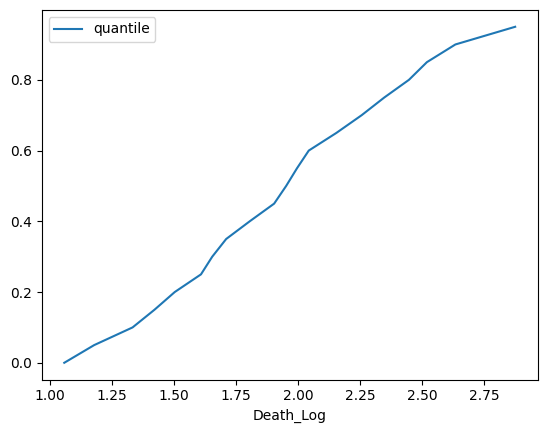

In [114]:
mort_log_dist = mortality_data.death_log.quantile([i/20 for i in range(0,20)])
mort_log_dist_df = pd.DataFrame({"quantile":mort_log_dist.index, "Death_Log":mort_log_dist.values})
mort_log_dist_df.plot.line(y="quantile", x = "Death_Log")

<AxesSubplot: xlabel='DeathRate'>

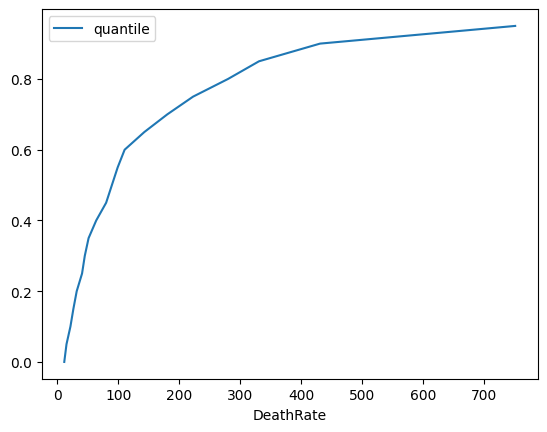

In [113]:
mort_dist_df.plot.line(y="quantile", x = "DeathRate")

In [ ]:
mort_dist.plot.line(y="quantile", x = "death_log")

In [115]:
# compare with SUM() OVER in SQL
mortality_data["CumDeathRate"] = mortality_data.DeathRate.cumsum()
mortality_data

,Year,AgeGroup,DeathRate,death_log,outlier,CumDeathRate
0,1900,1-4 Years,1983.8,3.297498,True,1983.8
1,1901,1-4 Years,1695.0,3.229170,True,3678.8
2,1902,1-4 Years,1655.7,3.218982,True,5334.5
3,1903,1-4 Years,1542.1,3.188113,True,6876.6
4,1904,1-4 Years,1591.5,3.201807,True,8468.1
...,...,...,...,...,...,...
471,2014,15-19 Years,45.5,1.658011,False,91631.7
472,2015,15-19 Years,48.3,1.683947,False,91680.0
473,2016,15-19 Years,51.2,1.709270,False,91731.2
474,2017,15-19 Years,51.5,1.711807,False,91782.7


<AxesSubplot: >

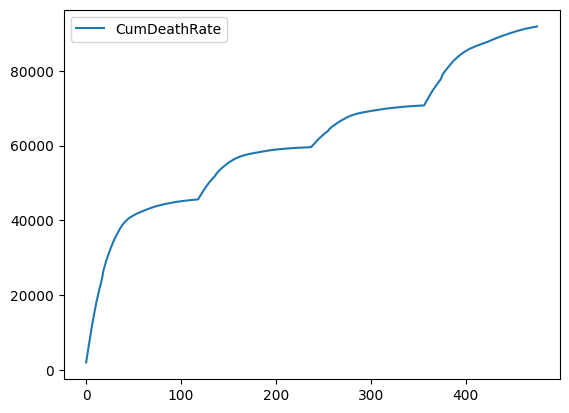

In [116]:
mortality_data.plot.line( y = "CumDeathRate")

### Use Python for column arithmetic

In [118]:
mortality_data['MeanCentered'] = \
    mortality_data.DeathRate - mortality_data.DeathRate.mean()

In [120]:
mortality_data['deathlogMeanCentered'] = \
    mortality_data.death_log - mortality_data.death_log.mean()

In [122]:
# Z Score = how many stdev from mean?
mortality_data['DeathRateZScore'] = \
    (mortality_data.DeathRate - mortality_data.DeathRate.mean()) / \
    mortality_data.DeathRate.std()

In [123]:
#mortality_data.head(4)
mortality_data.DeathRateZScore.describe()

count    4.760000e+02
mean     2.985474e-17
std      1.000000e+00
min     -6.190626e-01
25%     -5.195654e-01
50%     -3.527136e-01
75%      1.011200e-01
max      6.107530e+00
Name: DeathRateZScore, dtype: float64

In [124]:
mortality_data['DeathRatePer100k'] = mortality_data.DeathRate / 100000

In [125]:
mortality_data.head(4)

,Year,AgeGroup,DeathRate,death_log,outlier,CumDeathRate,MeanCentered,deathlogMeanCentered,DeathRateZScore,DeathRatePer100k
0,1900,1-4 Years,1983.8,3.297498,True,1983.8,1790.87584,1.323478,6.107530,0.019838
1,1901,1-4 Years,1695.0,3.229170,True,3678.8,1502.07584,1.255149,5.122619,0.016950
2,1902,1-4 Years,1655.7,3.218982,True,5334.5,1462.77584,1.244961,4.988592,0.016557
3,1903,1-4 Years,1542.1,3.188113,True,6876.6,1349.17584,1.214092,4.601175,0.015421


In [129]:
mortality_data[3:30:3]

,AgeGroup,DeathRate,death_log,outlier,CumDeathRate,MeanCentered,deathlogMeanCentered,DeathRateZScore,DeathRatePer100k
Year,,,,,,,,,
1903,1-4 Years,1542.1,3.188113,True,6876.6,1349.17584,1.214092,4.601175,0.015421
1906,1-4 Years,1580.0,3.198657,True,11547.0,1387.07584,1.224637,4.730427,0.015800
1909,1-4 Years,1348.9,3.129980,True,15761.0,1155.97584,1.155959,3.942293,0.013489
1912,1-4 Years,1094.1,3.039057,True,19428.4,901.17584,1.065037,3.073334,0.010941
1915,1-4 Years,924.2,2.965766,True,22570.2,731.27584,0.991746,2.493914,0.009242
1918,1-4 Years,1573.5,3.196867,True,26321.2,1380.57584,1.222846,4.708260,0.015735
1921,1-4 Years,801.2,2.903741,True,29037.6,608.27584,0.929721,2.074439,0.008012
1924,1-4 Years,683.2,2.834548,False,31269.5,490.27584,0.860527,1.672017,0.006832
1927,1-4 Years,591.0,2.771587,False,33224.9,398.07584,0.797567,1.357582,0.005910


## Shape the data

### Set and use an index

In [128]:
mortality_data = mortality_data.set_index('Year')
mortality_data.head(2)

,AgeGroup,DeathRate,death_log,outlier,CumDeathRate,MeanCentered,deathlogMeanCentered,DeathRateZScore,DeathRatePer100k
Year,,,,,,,,,
1900,1-4 Years,1983.8,3.297498,True,1983.8,1790.87584,1.323478,6.107530,0.019838
1901,1-4 Years,1695.0,3.229170,True,3678.8,1502.07584,1.255149,5.122619,0.016950


In [ ]:
len(mortality_data)

In [130]:
mortality_data.reset_index(inplace=True)
mortality_data

,Year,AgeGroup,DeathRate,death_log,outlier,CumDeathRate,MeanCentered,deathlogMeanCentered,DeathRateZScore,DeathRatePer100k
0,1900,1-4 Years,1983.8,3.297498,True,1983.8,1790.87584,1.323478,6.107530,0.019838
1,1901,1-4 Years,1695.0,3.229170,True,3678.8,1502.07584,1.255149,5.122619,0.016950
2,1902,1-4 Years,1655.7,3.218982,True,5334.5,1462.77584,1.244961,4.988592,0.016557
3,1903,1-4 Years,1542.1,3.188113,True,6876.6,1349.17584,1.214092,4.601175,0.015421
4,1904,1-4 Years,1591.5,3.201807,True,8468.1,1398.57584,1.227786,4.769646,0.015915
...,...,...,...,...,...,...,...,...,...,...
471,2014,15-19 Years,45.5,1.658011,False,91631.7,-147.42416,-0.316009,-0.502769,0.000455
472,2015,15-19 Years,48.3,1.683947,False,91680.0,-144.62416,-0.290073,-0.493220,0.000483
473,2016,15-19 Years,51.2,1.709270,False,91731.2,-141.72416,-0.264750,-0.483330,0.000512
474,2017,15-19 Years,51.5,1.711807,False,91782.7,-141.42416,-0.262213,-0.482307,0.000515


1900    4
1975    4
1987    4
1986    4
1985    4
       ..
1935    4
1934    4
1933    4
1932    4
2018    4
Name: Year, Length: 119, dtype: int64

In [132]:
# NOTE: the following line of code causes ValueError: Index has duplicate keys
#primary key = unique value for one row
mortality_data = mortality_data.set_index('Year', verify_integrity=True)
#mortality_data

ValueError: Index has duplicate keys: Int64Index([1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909,
            ...
            2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018],
           dtype='int64', name='Year', length=119)

In [141]:
mortality_data_drop = mortality_data.drop(columns=["CumDeathRate","DeathRateZScore"])
# mortality_data.drop(columns=["CumDeathRate","DeathRateZScore"],inplace= True)
mortality_data_drop

,Year,AgeGroup,DeathRate,death_log,outlier,MeanCentered,deathlogMeanCentered,DeathRatePer100k
0,1900,1-4 Years,1983.8,3.297498,True,1790.87584,1.323478,0.019838
1,1901,1-4 Years,1695.0,3.229170,True,1502.07584,1.255149,0.016950
2,1902,1-4 Years,1655.7,3.218982,True,1462.77584,1.244961,0.016557
3,1903,1-4 Years,1542.1,3.188113,True,1349.17584,1.214092,0.015421
4,1904,1-4 Years,1591.5,3.201807,True,1398.57584,1.227786,0.015915
...,...,...,...,...,...,...,...,...
471,2014,15-19 Years,45.5,1.658011,False,-147.42416,-0.316009,0.000455
472,2015,15-19 Years,48.3,1.683947,False,-144.62416,-0.290073,0.000483
473,2016,15-19 Years,51.2,1.709270,False,-141.72416,-0.264750,0.000512
474,2017,15-19 Years,51.5,1.711807,False,-141.42416,-0.262213,0.000515


In [133]:
mortality_data = mortality_data.set_index(
    ['Year','AgeGroup'], verify_integrity=True)
mortality_data.head(2)

,,DeathRate,death_log,outlier,CumDeathRate,MeanCentered,deathlogMeanCentered,DeathRateZScore,DeathRatePer100k
Year,AgeGroup,,,,,,,,
1900,1-4 Years,1983.8,3.297498,True,1983.8,1790.87584,1.323478,6.107530,0.019838
1901,1-4 Years,1695.0,3.229170,True,3678.8,1502.07584,1.255149,5.122619,0.016950


In [134]:
mortality_data.reset_index(inplace=True)
mortality_data.head(2)

,Year,AgeGroup,DeathRate,death_log,outlier,CumDeathRate,MeanCentered,deathlogMeanCentered,DeathRateZScore,DeathRatePer100k
0,1900,1-4 Years,1983.8,3.297498,True,1983.8,1790.87584,1.323478,6.107530,0.019838
1,1901,1-4 Years,1695.0,3.229170,True,3678.8,1502.07584,1.255149,5.122619,0.016950


In [135]:
mortality_data.shape

(476, 10)

### Pivot the data

In [138]:
mortality_wide = mortality_data.pivot(
    index='Year', columns='AgeGroup')
mortality_wide.head(3)

DeathRate                                   death_log              \
AgeGroup 1-4 Years 10-14 Years 15-19 Years 5-9 Years 1-4 Years 10-14 Years   
Year                                                                         
1900        1983.8       298.3       484.8     466.1  3.297498    2.474653   
1901        1695.0       273.6       454.4     427.6  3.229170    2.437116   
1902        1655.7       252.5       421.5     403.3  3.218982    2.402261   

                                 outlier              ...  \
AgeGroup 15-19 Years 5-9 Years 1-4 Years 10-14 Years  ...   
Year                                                  ...   
1900        2.685563  2.668479      True       False  ...   
1901        2.657438  2.631038      True       False  ...   
1902        2.624798  2.605628      True       False  ...   

         deathlogMeanCentered           DeathRateZScore              \
AgeGroup          15-19 Years 5-9 Years       1-4 Years 10-14 Years   
Year                                                                  
1900                 0.711542  0.694459        6.107530    0.359370   
1901                 0.683418  0.657017        5.122619    0.275134   
1902                 0.650777  0.631608        4.988592    0.203175   

                               DeathRatePer100k                          \
AgeGroup 15-19 Years 5-9 Years        1-4 Years 10-14 Years 15-19 Years   
Year                                                                      
1900        0.995402  0.931628         0.019838    0.002983    0.004848   
1901        0.891727  0.800329         0.016950    0.002736    0.004544   
1902        0.779526  0.717457         0.016557    0.002525    0.004215   

                    
AgeGroup 5-9 Years  
Year                
1900      0.004661  
1901      0.004276  
1902      0.004033  

[3 rows x 32 columns]

In [139]:
mortality_wide.shape

(119, 32)

In [140]:
119*32

3808

In [142]:
# piviot increases number of columns
mortality_wide = mortality_data.pivot(
    index=['Year','MeanCentered'], columns='AgeGroup', values='DeathRate')
mortality_wide.head(3)    

AgeGroup           1-4 Years  10-14 Years  15-19 Years  5-9 Years
Year MeanCentered                                                
1900 105.37584           NaN        298.3          NaN        NaN
     273.17584           NaN          NaN          NaN      466.1
     291.87584           NaN          NaN        484.8        NaN

In [143]:
mortality_wide = mortality_data.pivot(
    index='Year', columns='AgeGroup')
mortality_wide.head(3)

DeathRate                                   death_log              \
AgeGroup 1-4 Years 10-14 Years 15-19 Years 5-9 Years 1-4 Years 10-14 Years   
Year                                                                         
1900        1983.8       298.3       484.8     466.1  3.297498    2.474653   
1901        1695.0       273.6       454.4     427.6  3.229170    2.437116   
1902        1655.7       252.5       421.5     403.3  3.218982    2.402261   

                                 outlier              ...  \
AgeGroup 15-19 Years 5-9 Years 1-4 Years 10-14 Years  ...   
Year                                                  ...   
1900        2.685563  2.668479      True       False  ...   
1901        2.657438  2.631038      True       False  ...   
1902        2.624798  2.605628      True       False  ...   

         deathlogMeanCentered           DeathRateZScore              \
AgeGroup          15-19 Years 5-9 Years       1-4 Years 10-14 Years   
Year                                                                  
1900                 0.711542  0.694459        6.107530    0.359370   
1901                 0.683418  0.657017        5.122619    0.275134   
1902                 0.650777  0.631608        4.988592    0.203175   

                               DeathRatePer100k                          \
AgeGroup 15-19 Years 5-9 Years        1-4 Years 10-14 Years 15-19 Years   
Year                                                                      
1900        0.995402  0.931628         0.019838    0.002983    0.004848   
1901        0.891727  0.800329         0.016950    0.002736    0.004544   
1902        0.779526  0.717457         0.016557    0.002525    0.004215   

                    
AgeGroup 5-9 Years  
Year                
1900      0.004661  
1901      0.004276  
1902      0.004033  

[3 rows x 32 columns]

In [144]:
mortality_wide.to_csv("mortality_wide.csv")

In [145]:
mortality_wide.shape

(119, 32)

### Melt the data

In [146]:
mortality_wide = mortality_data.pivot(
    index='Year', columns='AgeGroup', values='DeathRate')
mortality_wide.head(3)

AgeGroup,1-4 Years,10-14 Years,15-19 Years,5-9 Years
Year,,,,
1900,1983.8,298.3,484.8,466.1
1901,1695.0,273.6,454.4,427.6
1902,1655.7,252.5,421.5,403.3


In [147]:
# get starting data


# save to Excel format to remove indexes
mortality_wide.to_excel('mortality_wide.xlsx')
mortality_wide = pd.read_excel('mortality_wide.xlsx')

mortality_wide.head(4)

,Year,1-4 Years,10-14 Years,15-19 Years,5-9 Years
0,1900,1983.8,298.3,484.8,466.1
1,1901,1695.0,273.6,454.4,427.6
2,1902,1655.7,252.5,421.5,403.3
3,1903,1542.1,268.2,434.1,414.7


In [148]:
#unpivot ~= melt decreases number of columns
mortality_long = mortality_wide.melt(
    id_vars = 'Year',
    value_vars=['1-4 Years','5-9 Years'],
    var_name ='AgeGroup',
    value_name='DeathRate')

with pd.option_context('display.max_rows', 4):
    display(mortality_long)

,Year,AgeGroup,DeathRate
0,1900,1-4 Years,1983.8
1,1901,1-4 Years,1695.0
...,...,...,...
236,2017,5-9 Years,11.6
237,2018,5-9 Years,11.5


In [150]:
mortality_long.AgeGroup.value_counts()

1-4 Years    119
5-9 Years    119
Name: AgeGroup, dtype: int64

## Analyze the data

### Group the data

In [151]:
mortality_data.groupby('AgeGroup').mean()

,Year,DeathRate,death_log,outlier,CumDeathRate,MeanCentered,deathlogMeanCentered,DeathRateZScore,DeathRatePer100k
AgeGroup,,,,,,,,,
1-4 Years,1959.0,383.226050,2.193591,0.193277,37353.117647,190.301891,0.219570,0.648998,0.003832
10-14 Years,1959.0,93.769748,1.772540,0.000000,67911.569748,-99.154412,-0.201480,-0.338152,0.000938
15-19 Years,1959.0,177.374790,2.134860,0.000000,85460.104202,-15.549370,0.160839,-0.053029,0.001774
5-9 Years,1959.0,117.326050,1.795091,0.000000,56497.440336,-75.598109,-0.178929,-0.257817,0.001173


<AxesSubplot: xlabel='Year'>

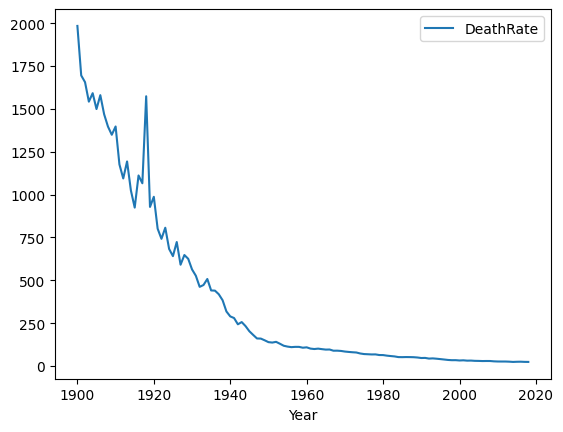

In [155]:
mortality_data.query("AgeGroup == '1-4 Years'").plot.line(x="Year", y = "DeathRate")

In [156]:
mortality_data.groupby('AgeGroup').median()

,Year,DeathRate,death_log,outlier,CumDeathRate,MeanCentered,deathlogMeanCentered,DeathRateZScore,DeathRatePer100k
AgeGroup,,,,,,,,,
1-4 Years,1959.0,109.1,2.037825,0.0,42409.4,-83.82416,0.063804,-0.285871,0.001091
10-14 Years,1959.0,44.6,1.649335,0.0,69110.8,-148.32416,-0.324686,-0.505839,0.000446
15-19 Years,1959.0,106.9,2.028978,0.0,87096.4,-86.02416,0.054957,-0.293373,0.001069
5-9 Years,1959.0,48.4,1.684845,0.0,58040.5,-144.52416,-0.289175,-0.492879,0.000484


In [157]:
mortality_data.groupby('Year').median().head(4)

C:\Users\andre\AppData\Local\Temp\ipykernel_100724\1184888789.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mortality_data.groupby('Year').median().head(4)


,DeathRate,death_log,outlier,CumDeathRate,MeanCentered,deathlogMeanCentered,DeathRateZScore,DeathRatePer100k
Year,,,,,,,,
1900,475.45,2.677021,0.0,52967.00,282.52584,0.703000,0.963515,0.004755
1901,441.00,2.644238,0.0,53317.60,248.07584,0.670218,0.846028,0.004410
1902,412.40,2.615213,0.0,53645.50,219.47584,0.641193,0.748492,0.004124
1903,424.40,2.627662,0.0,53986.95,231.47584,0.653642,0.789416,0.004244


In [158]:
mortality_data.groupby(['Year','AgeGroup']).count().head()

DeathRate  death_log  outlier  CumDeathRate  MeanCentered  \
Year AgeGroup                                                                 
1900 1-4 Years            1          1        1             1             1   
     10-14 Years          1          1        1             1             1   
     15-19 Years          1          1        1             1             1   
     5-9 Years            1          1        1             1             1   
1901 1-4 Years            1          1        1             1             1   

                  deathlogMeanCentered  DeathRateZScore  DeathRatePer100k  
Year AgeGroup                                                              
1900 1-4 Years                       1                1                 1  
     10-14 Years                     1                1                 1  
     15-19 Years                     1                1                 1  
     5-9 Years                       1                1                 1  
1901 1-4 Years                       1                1                 1

### Aggregate the data

In [159]:
mortality_data[['AgeGroup','DeathRate']].groupby('AgeGroup').agg(['mean','median','min','max','std'])

DeathRate                                 
                   mean median   min     max         std
AgeGroup                                                
1-4 Years    383.226050  109.1  24.0  1983.8  500.454211
10-14 Years   93.769748   44.6  13.9   375.1   88.404363
15-19 Years  177.374790  106.9  44.8   777.4  138.362290
5-9 Years    117.326050   48.4  11.4   466.1  127.474958

In [164]:
mort_grouping = mortality_data[['AgeGroup','DeathRate']].groupby('AgeGroup')
type(mort_grouping)

pandas.core.groupby.generic.DataFrameGroupBy

In [165]:
AgeGS = mortality_data.groupby("AgeGroup")
type(AgeGS)

pandas.core.groupby.generic.DataFrameGroupBy

In [170]:
FilteredAgeGS = mortality_data.query("DeathRate > 200").groupby("Year")

In [176]:
col_list = ["DeathRate","death_log"]
agg_list = ['mean','median','std','nunique']

In [177]:
FilteredAgeGS[col_list].agg(agg_list)

DeathRate                             death_log                      \
            mean  median         std nunique      mean    median       std   
Year                                                                         
1900  808.250000  475.45  788.173697       4  2.781548  2.677021  0.357018   
1901  712.650000  441.00  659.727972       4  2.738690  2.644238  0.341423   
1902  683.250000  412.40  652.709642       4  2.712917  2.615213  0.352082   
1903  664.775000  424.40  589.553319       4  2.717974  2.627662  0.327291   
1904  698.275000  448.20  599.586065       4  2.747042  2.650889  0.313687   
1905  653.575000  417.80  567.563890       4  2.715851  2.620393  0.317866   
1906  668.700000  411.30  611.688341       4  2.714726  2.612679  0.334614   
1907  634.350000  401.65  560.416360       4  2.698888  2.602091  0.324555   
1908  599.150000  375.95  535.476327       4  2.672054  2.574402  0.327263   
1909  568.300000  346.90  523.462479       4  2.643013  2.539700  0.335634   
1910  588.375000  360.15  542.539617       4  2.657630  2.556252  0.336619   
1911  518.550000  338.00  442.277601       4  2.617999  2.527421  0.314781   
1912  482.750000  317.35  411.887319       4  2.586014  2.499609  0.317316   
1913  521.550000  339.00  452.045119       4  2.616875  2.529341  0.321180   
1914  465.875000  316.05  376.266850       4  2.580920  2.498452  0.300158   
1915  505.233333  330.90  364.534393       3  2.633812  2.519697  0.292121   
1916  488.700000  319.10  419.734400       4  2.589986  2.501035  0.319385   
1917  488.975000  335.50  390.308249       4  2.602894  2.521786  0.299698   
1918  793.475000  612.65  548.682400       4  2.828210  2.770913  0.280293   
1919  475.725000  369.25  313.099615       4  2.615072  2.559545  0.259666   
1920  478.800000  349.05  346.357975       4  2.607814  2.537657  0.276328   
1921  404.750000  303.95  268.624527       4  2.547240  2.481604  0.250679   
1922  433.733333  319.60  269.946760       3  2.584832  2.504607  0.255102   
1923  457.500000  325.80  305.443759       3  2.599958  2.512951  0.273822   
1924  406.133333  313.50  244.297489       3  2.558850  2.496238  0.250334   
1925  388.833333  314.00  224.315812       3  2.543033  2.496930  0.244062   
1926  414.900000  307.50  271.245479       3  2.559077  2.487845  0.271779   
1927  362.933333  289.50  201.641175       3  2.517308  2.461649  0.231523   
1928  389.466667  307.80  228.424875       3  2.542697  2.488269  0.245888   
1929  377.166667  298.00  219.720466       3  2.529502  2.474216  0.243829   
1930  420.700000  420.70  202.091118       2  2.597352  2.597352  0.217251   
1931  395.050000  395.05  186.039794       2  2.571131  2.571131  0.212627   
1932  349.700000  349.70  158.674762       2  2.520106  2.520106  0.204272   
1933  348.000000  348.00  176.211010       2  2.511788  2.511788  0.230100   
1934  365.850000  365.85  200.606194       2  2.527928  2.527928  0.251277   
1935  331.600000  331.60  154.573542       2  2.495640  2.495640  0.210294   
1936  335.100000  335.10  148.068160       2  2.502869  2.502869  0.198536   
1937  318.850000  318.85  141.209224       2  2.481174  2.481174  0.199021   
1938  383.800000  383.80         NaN       1  2.584105  2.584105       NaN   
1939  318.300000  318.30         NaN       1  2.502837  2.502837       NaN   
1940  289.600000  289.60         NaN       1  2.461799  2.461799       NaN   
1941  279.900000  279.90         NaN       1  2.447003  2.447003       NaN   
1942  243.400000  243.40         NaN       1  2.386321  2.386321       NaN   
1943  256.400000  256.40         NaN       1  2.408918  2.408918       NaN   
1944  233.000000  233.00         NaN       1  2.367356  2.367356       NaN   
1945  203.000000  203.00         NaN       1  2.307496  2.307496       NaN   

              
     nunique  
Year          
1900       4  
1901       4  
1902       4  
1903       4  
1904       4  
1905       4  
1906       4  
1907       4  
1908       4  
1909

In [167]:
AgeGS["DeathRate"].agg(['mean','median','std','nunique'])

,mean,median,std,nunique
AgeGroup,,,,
1-4 Years,383.226050,109.1,500.454211,117
10-14 Years,93.769748,44.6,88.404363,115
15-19 Years,177.374790,106.9,138.362290,117
5-9 Years,117.326050,48.4,127.474958,115


In [166]:
AgeGS["outlier"].agg(['mean','median','std','nunique'])

,mean,median,std,nunique
AgeGroup,,,,
1-4 Years,0.193277,0.0,0.396538,2
10-14 Years,0.000000,0.0,0.000000,1
15-19 Years,0.000000,0.0,0.000000,1
5-9 Years,0.000000,0.0,0.000000,1


In [178]:
mortality_data.groupby('AgeGroup')['DeathRate'] \
    .agg(['mean','median','std','nunique'])

,mean,median,std,nunique
AgeGroup,,,,
1-4 Years,383.226050,109.1,500.454211,117
10-14 Years,93.769748,44.6,88.404363,115
15-19 Years,177.374790,106.9,138.362290,117
5-9 Years,117.326050,48.4,127.474958,115


In [179]:
mortality_data.groupby('Year')['DeathRate'] \
    .agg(['mean','median','std','min','max','var','nunique']).head(3)

,mean,median,std,min,max,var,nunique
Year,,,,,,,
1900,808.25,475.45,788.173697,298.3,1983.8,621217.776667,4
1901,712.65,441.00,659.727972,273.6,1695.0,435240.996667,4
1902,683.25,412.40,652.709642,252.5,1655.7,426029.876667,4


In [180]:
435240.996667 ** 0.5

659.7279717178892

In [182]:
def fun_1q(foo): return foo.quantile(0.75)

fun_1q(mortality_data.death_log)

2.3474753892191407

In [183]:
fun_1q(mortality_wide[['1-4 Years']])

1-4 Years    577.3
Name: 0.75, dtype: float64

## Visualize the data

In [184]:
mortality_data.pivot(index='Year',columns='AgeGroup')['DeathRate']

AgeGroup,1-4 Years,10-14 Years,15-19 Years,5-9 Years
Year,,,,
1900,1983.8,298.3,484.8,466.1
1901,1695.0,273.6,454.4,427.6
1902,1655.7,252.5,421.5,403.3
1903,1542.1,268.2,434.1,414.7
1904,1591.5,305.2,471.4,425.0
...,...,...,...,...
2014,24.0,14.0,45.5,11.5
2015,24.9,14.6,48.3,11.7
2016,25.3,14.6,51.2,12.2


<AxesSubplot: >

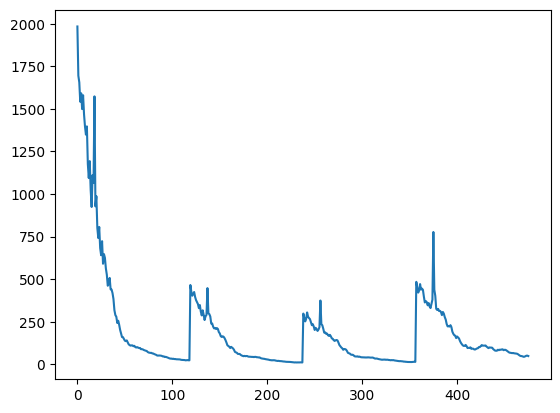

In [185]:
mortality_data['DeathRate'].plot()

In [186]:
mortality_data.pivot(index='Year',columns='AgeGroup')['DeathRate']

AgeGroup,1-4 Years,10-14 Years,15-19 Years,5-9 Years
Year,,,,
1900,1983.8,298.3,484.8,466.1
1901,1695.0,273.6,454.4,427.6
1902,1655.7,252.5,421.5,403.3
1903,1542.1,268.2,434.1,414.7
1904,1591.5,305.2,471.4,425.0
...,...,...,...,...
2014,24.0,14.0,45.5,11.5
2015,24.9,14.6,48.3,11.7
2016,25.3,14.6,51.2,12.2


<AxesSubplot: xlabel='Year'>

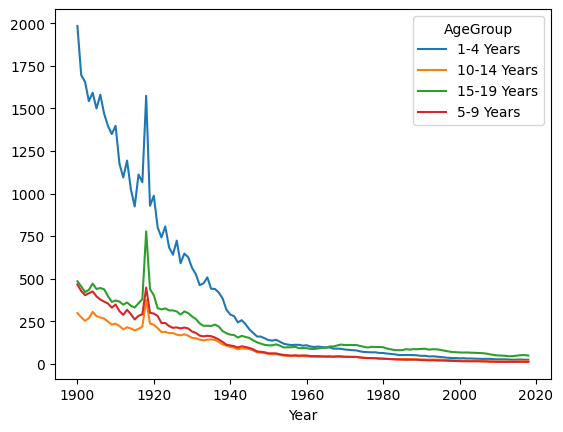

In [187]:
#mortality_data['DeathRate'].plot()
mortality_data.pivot(index='Year',columns='AgeGroup')['DeathRate'].plot()

In [188]:
mortality_data.groupby('AgeGroup')['DeathRate'] \
    .agg(['mean','median','std'])


,mean,median,std
AgeGroup,,,
1-4 Years,383.226050,109.1,500.454211
10-14 Years,93.769748,44.6,88.404363
15-19 Years,177.374790,106.9,138.362290
5-9 Years,117.326050,48.4,127.474958


In [ ]:
mortality_data.plot.

<AxesSubplot: >

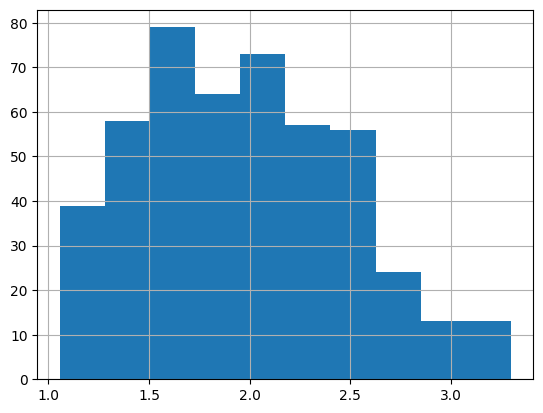

In [195]:
mortality_data.death_log.hist()

In [202]:
mortality_wide

,Year,1-4 Years,10-14 Years,15-19 Years,5-9 Years
0,1900,1983.8,298.3,484.8,466.1
1,1901,1695.0,273.6,454.4,427.6
2,1902,1655.7,252.5,421.5,403.3
3,1903,1542.1,268.2,434.1,414.7
4,1904,1591.5,305.2,471.4,425.0
...,...,...,...,...,...
114,2014,24.0,14.0,45.5,11.5
115,2015,24.9,14.6,48.3,11.7
116,2016,25.3,14.6,51.2,12.2
117,2017,24.3,15.5,51.5,11.6


<AxesSubplot: ylabel='DeathRate'>

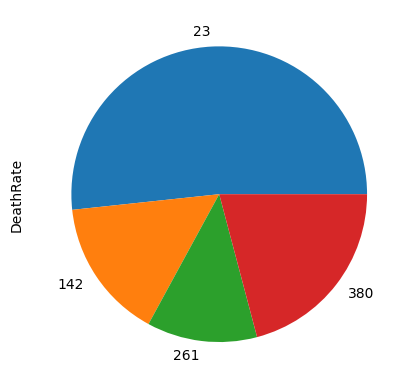

In [203]:
mortality_data.query("Year == 1923").DeathRate.plot.pie()

<AxesSubplot: xlabel='DeathRate', ylabel='Year'>

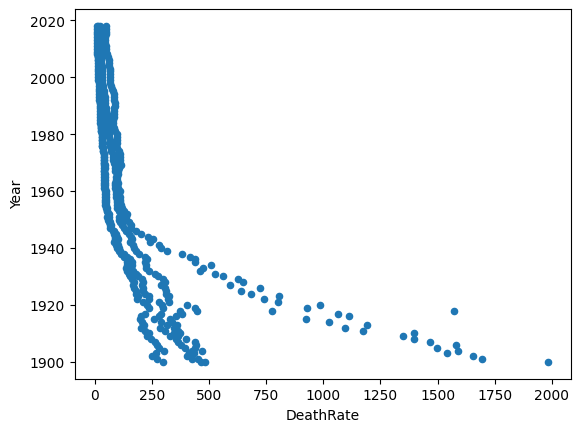

In [199]:
mortality_data.plot.scatter(x = 'DeathRate', y = 'Year')

In [205]:
import seaborn as sns

<AxesSubplot: xlabel='DeathRate', ylabel='AgeGroup'>

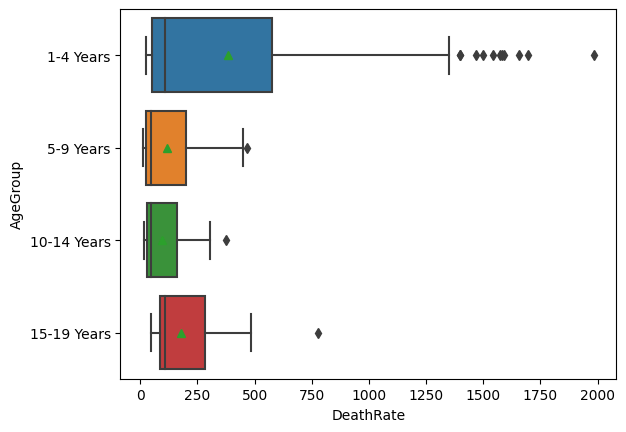

In [212]:
sns.boxplot(data=mortality_data, 
             x='DeathRate', y='AgeGroup',showmeans = True)

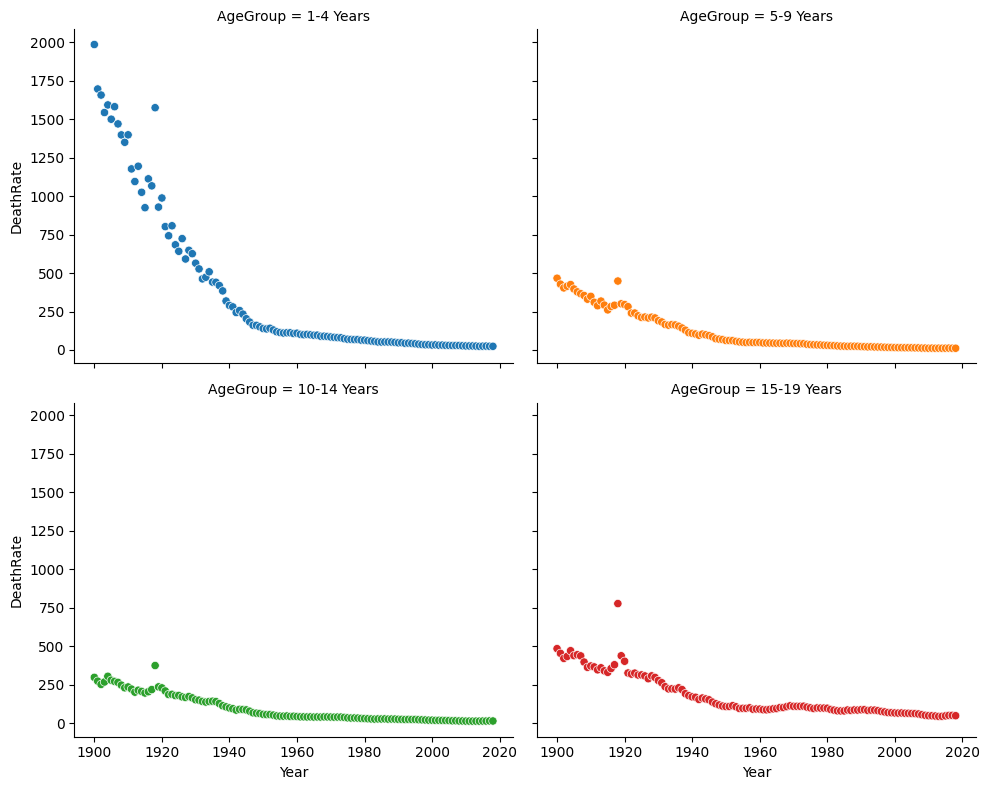

In [217]:
sns.relplot(data=mortality_data, 
            kind='scatter', x='Year', y='DeathRate', hue='AgeGroup', 
            height=4, aspect=1.25, 
            col='AgeGroup', col_wrap=2, legend=False)

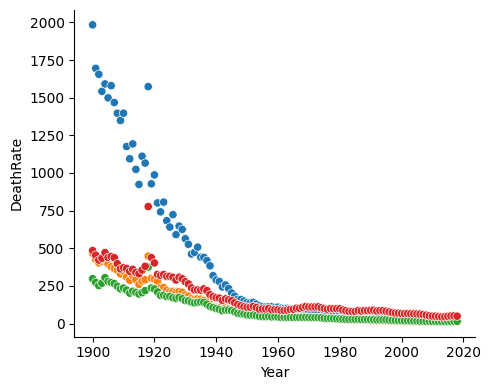

In [219]:
sns.relplot(data=mortality_data, 
            kind='scatter', x='Year', y='DeathRate', hue='AgeGroup', 
            height=4, aspect=1.25, 
              legend=False)